# **Week 13. Data Visualization Homework**

#*ID: 1002144121*

### Use the `housing_california.csv` dataset to answer the questions.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('housing_california.csv')
data.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


### **Question 1**

#### Histogram of Median Housing Prices:



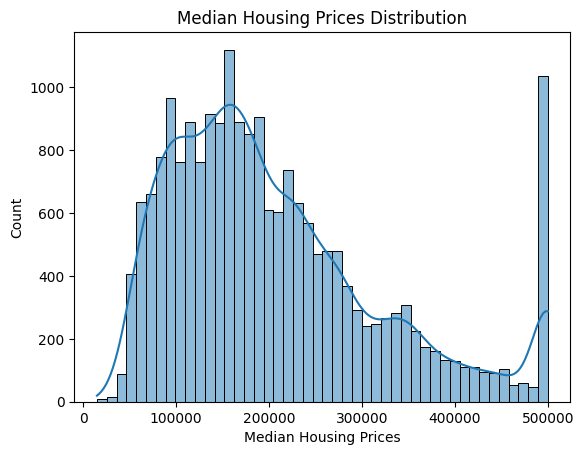

In [ ]:
sns.histplot(data['median_house_value'],kde=True)

plt.title('Median Housing Prices Distribution')
plt.xlabel('Median Housing Prices')

plt.show()



---



---



---



### **Question 2**

#### Scatter Plot of Population vs. Median House Value:



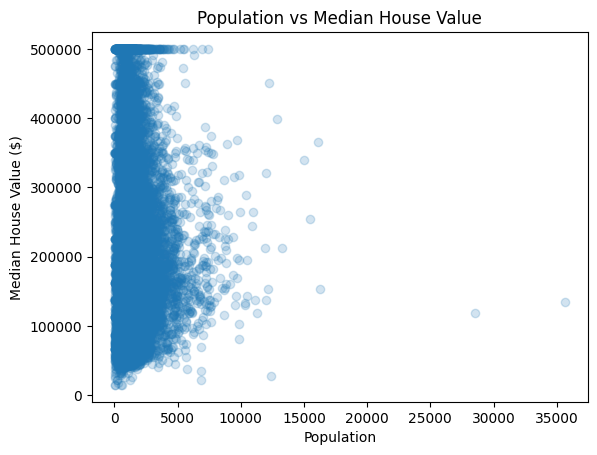

In [ ]:
plt.scatter(x=data['population'], y=data['median_house_value'], alpha=0.2)

plt.xlabel('Population')
plt.ylabel('Median House Value ($)')
plt.title('Population vs Median House Value')

plt.show()



---

---



---





### **Question 3**

#### Box Plot of Median Income:



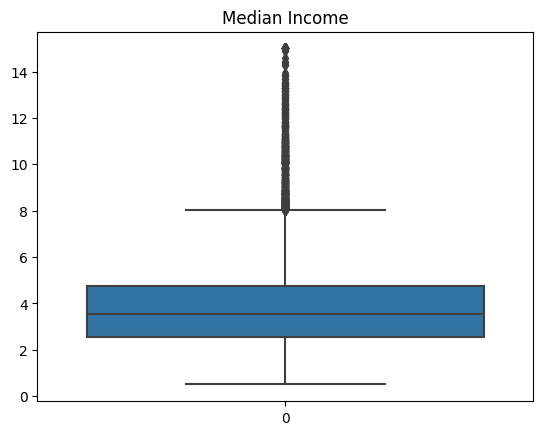

In [ ]:
sns.boxplot(data['median_income'])

plt.title('Median Income')

plt.show()



---



---



---



### **Question 4**

#### Pair Plot for Select Columns:


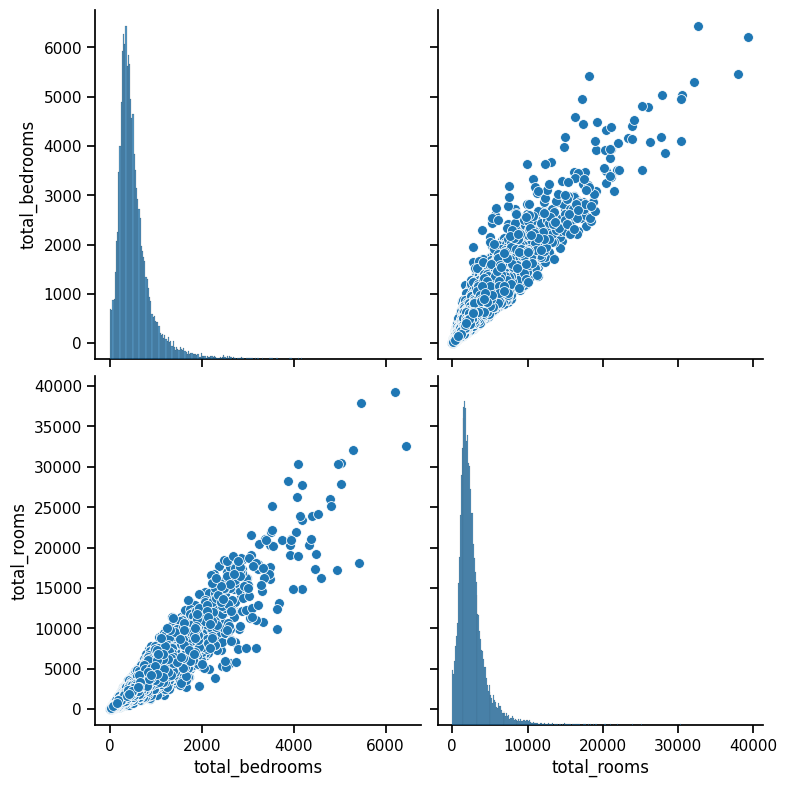

In [14]:
data2 = data[['total_bedrooms', 'total_rooms']] # create a new df with selected columns

sns.set_context('notebook', font_scale=1)

sns.pairplot(data2, markers=['o','s','D'], height=4, plot_kws={'s':50})

plt.show()



---


---



---




### **Question 5**

#### Bar Plot of Ocean Proximity Counts:


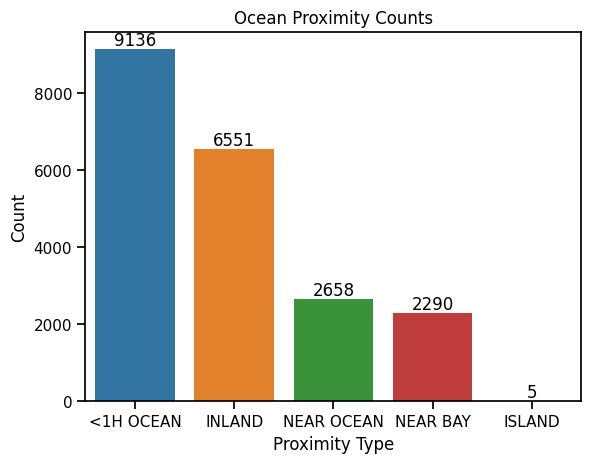

In [ ]:
## Create a dataframe of ocean proximity counts
prox_counts = pd.DataFrame(data['ocean_proximity'].value_counts().reset_index())
prox_counts.rename(columns={'index':'proximity_type',
                    'ocean_proximity':'count'}, inplace = True)

## Create the barplot using seaborn
ax = sns.barplot(data=prox_counts, x='proximity_type', y='count')
ax.bar_label(ax.containers[0]) ## Show each bar's value

plt.xlabel('Proximity Type')
plt.ylabel('Count')
plt.title('Ocean Proximity Counts')

plt.show()



---



---



---



### **Question 6**

#### Correlation Heatmap:


<ipython-input-6-541b548cbbf7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = data.corr()


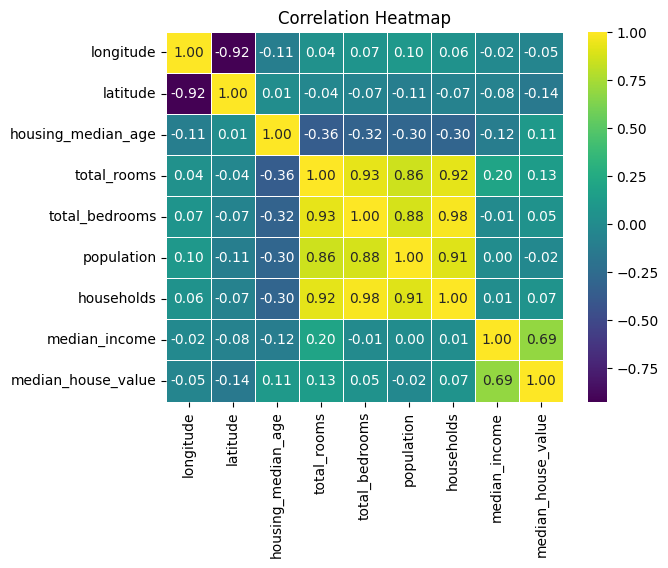

In [6]:
data_corr = data.corr()

sns.heatmap(data_corr, annot=True, cmap='viridis', fmt='.2f', linewidth=0.6)
plt.title('Correlation Heatmap')

plt.show()



---



---



---



### **Question 7**

#### Density Plot of Housing Median Age:


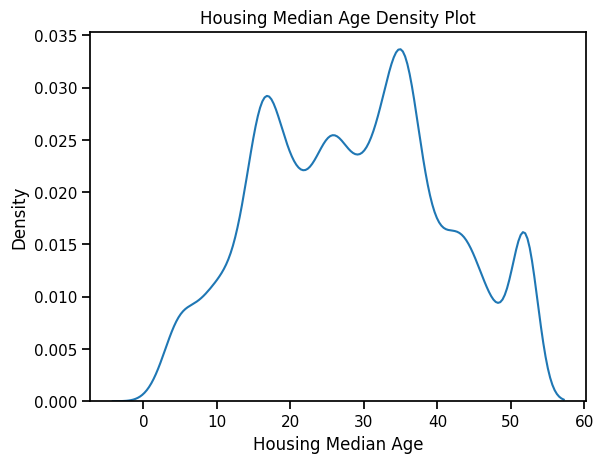

In [ ]:
sns.kdeplot(data['housing_median_age'])

plt.xlabel('Housing Median Age')
plt.title('Housing Median Age Density Plot')

plt.show()



---



---



---



### **Question 8**

#### Stacked Area Plot of Total Rooms and Bedrooms:


In [ ]:
import seaborn.objects as so # import seaborn.objects for area plot

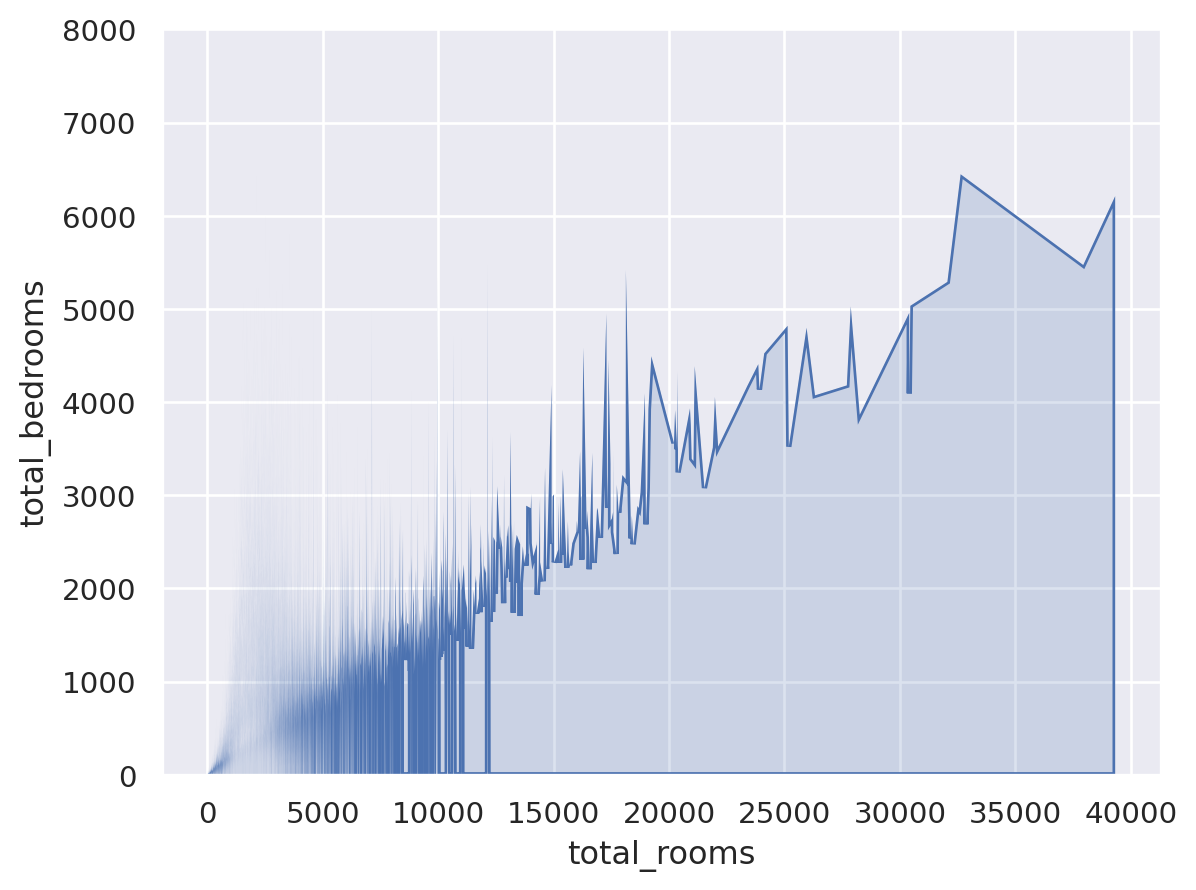

In [ ]:
so.Plot(data, 'total_rooms', 'total_bedrooms').add(so.Area(), so.Stack()) # seaborn objects stacked area plot



---



---



---



### **Question 9**

#### Hexbin Plot of Latitude and Longitude:


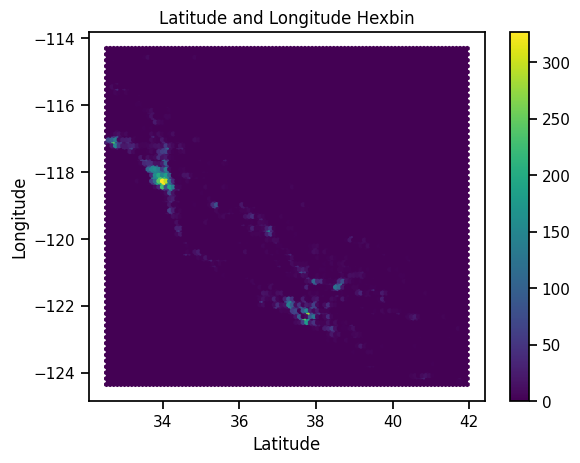

In [ ]:
plt.hexbin(data['latitude'], data['longitude'])
plt.colorbar()

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Latitude and Longitude Hexbin')

plt.show()



---



---



---



### **Question 10**

#### Facet Grid of Scatter Plots:


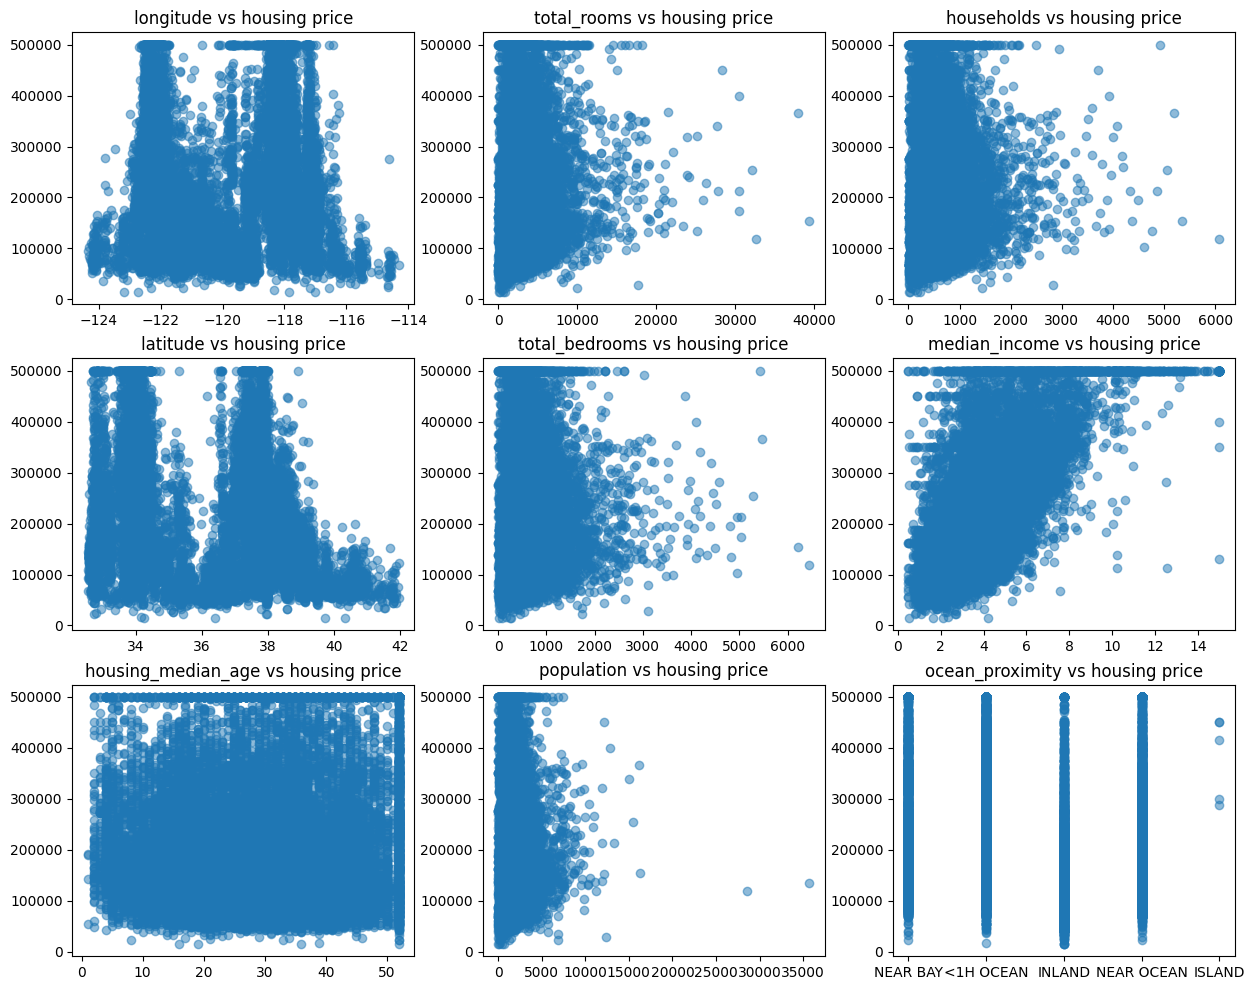

In [5]:
# initialize a figure of subplots
fig,axes=plt.subplots(3,3,figsize=(15,12))

x=0
y=0
## For each column in the dataset, create a scatter plot against housing price
for c in data:
  if(c=='median_house_value'): #Skip housing price vs housing price
    continue

  axes[x,y].scatter(data[c],data['median_house_value'], alpha=0.5) ## Create a scatter plot for each variable vs house price
  axes[x,y].set_title(c + ' vs housing price')

  if x==2: ## Reset x value and increase y value for the facet grid (control boundries)
    y+=1
    x=0
  else:
    x+=1 # itterate x

plt.show()